# Домашнее задание "Продвинутая линейная алгебра".

## Уровень 0:


### Задание 1

Дан объект в $2D$ пространстве

(-200.0, 200.0)

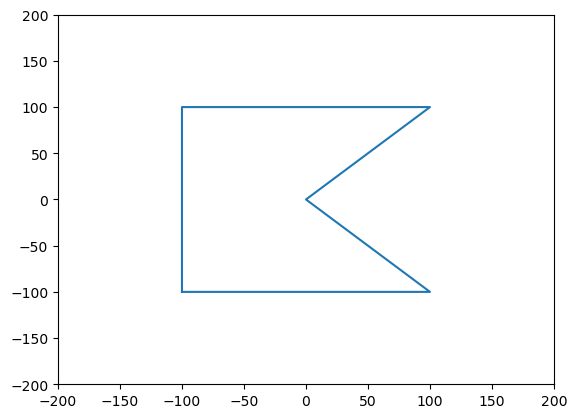

In [127]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи линейных отображений:
- Уменьшить объект в два раза
- Повернуть на 130 градусов
- Отразить объект относительно прямой y=x (поможет матрица `[[0, 1, 0], [1, 0, 0], [0, 0, 1]]`)


(-200.0, 200.0)

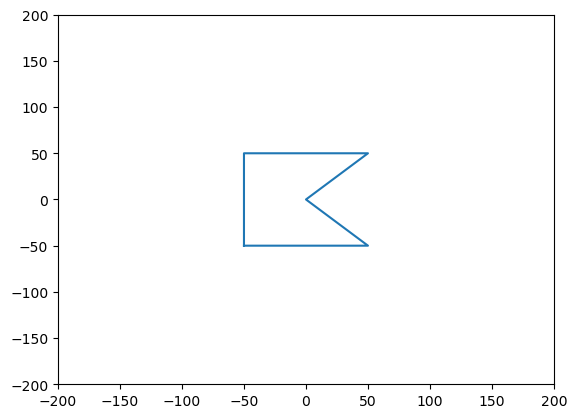

In [128]:
# Уменьшить объект в два раза

A_decrease = np.dot(A,0.5)
# или
# A_decrease = np.dot(A,[[0.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])

x = A_decrease[:,0]
y = A_decrease[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(-200.0, 200.0)

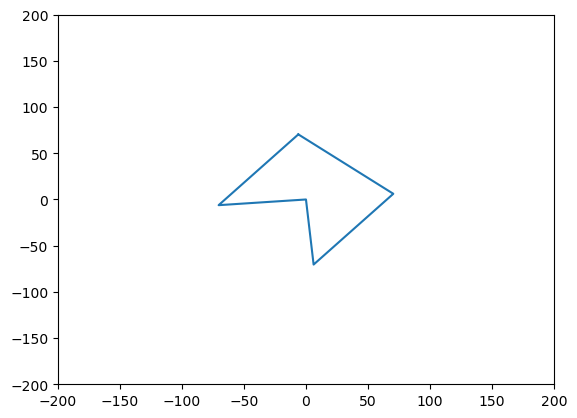

In [129]:
# Повернуть на 130 градусов

# Угол поворота в радианах
v = np.radians(130)  # Поворот на 130 градусов по часовой стрелке

# Матрица поворота
R = np.array([[np.cos(v), np.sin(v)],
            [-np.sin(v), np.cos(v)]])

for i in range(A_decrease.shape[0]):
    A_rotated[i, :2] = R @ A_decrease[i, :2]  # Поворачиваем только первые два элемента (x, y)

x = A_rotated[:,0]
y = A_rotated[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(-200.0, 200.0)

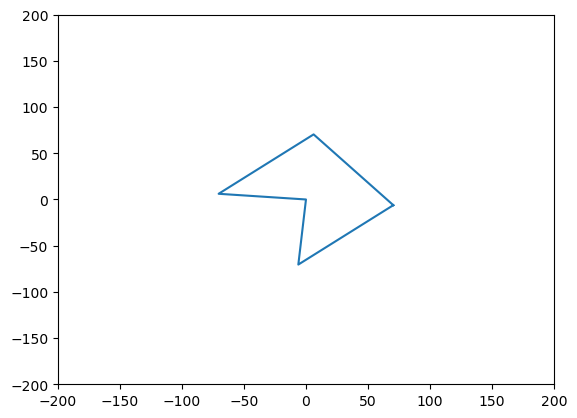

In [130]:
# Отразить объект относительно прямой y=x

A_axis = np.dot(A_rotated,[[0, 1, 0], [1, 0, 0], [0, 0, 1]])

x = A_axis[:,0]
y = A_axis[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

In [131]:
print(f'Матрица поворота: \n{A_rotated}\n')
print(f'Матрица отражения: \n{A_axis}')

Матрица поворота: 
[[ -6.16284167  70.44160264   0.        ]
 [ 70.44160264   6.16284167   0.        ]
 [  6.16284167 -70.44160264   0.        ]
 [  0.           0.           0.        ]
 [-70.44160264  -6.16284167   0.        ]
 [ -6.16284167  70.44160264   0.        ]]

Матрица отражения: 
[[ 70.44160264  -6.16284167   0.        ]
 [  6.16284167  70.44160264   0.        ]
 [-70.44160264   6.16284167   0.        ]
 [  0.           0.           0.        ]
 [ -6.16284167 -70.44160264   0.        ]
 [ 70.44160264  -6.16284167   0.        ]]


## Уровень 1:

### Задание 2

Найдите спектральное разложение матрицы:
```
m = np.array([[1, 2],
              [2, 3]])
print(m)
```



In [132]:
# Определим матрицу m
m = np.array([[1, 2],
              [2, 3]])

# Найдем собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eig(m)

# Соберем матрицы V и Λ
V = eigenvectors
Lambda = np.diag(eigenvalues)

print(f"Матрица m: \n{m}")
print(f"Собственные значения: \n{eigenvalues}")
print(f"Собственные векторы (матрица V): \n{V}")
print(f"Диагональная матрица собственных значений (матрица Λ): \n{Lambda}")

# Проверим разложение A = V * Λ * V^(-1)
m_reconstructed = V @ Lambda @ np.linalg.inv(V)
print(f"\nВосстановленная матрица m: \n{m_reconstructed}")

Матрица m: 
[[1 2]
 [2 3]]
Собственные значения: 
[-0.23606798  4.23606798]
Собственные векторы (матрица V): 
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
Диагональная матрица собственных значений (матрица Λ): 
[[-0.23606798  0.        ]
 [ 0.          4.23606798]]

Восстановленная матрица m: 
[[1. 2.]
 [2. 3.]]


In [133]:
from sklearn.decomposition import PCA

In [134]:
# Выполним PCA
pca = PCA(n_components=2)  # Уменьшаем размерность до 2
data_pca = pca.fit_transform(m)

In [135]:
# Выводим объясненную дисперсию
print("Объясненная дисперсия компонент:")
print(pca.explained_variance_ratio_)

Объясненная дисперсия компонент:
[1.00000000e+00 2.81351049e-34]


In [136]:
# Cингулярные значения главных компонент
pca.singular_values_

array([1.00000000e+00, 1.67735223e-17])

### Результаты собственных значений и применения PCA разнятся, почему?

In [137]:
print(f"Собственные значения: \n{eigenvalues}")
print(f"Вариации PCA: \n{pca.explained_variance_ratio_}")

Собственные значения: 
[-0.23606798  4.23606798]
Вариации PCA: 
[1.00000000e+00 2.81351049e-34]
